# 1 Carga de Datos

In [1]:
import pandas as pd  # para manipulación de dataframes y tablas
from datetime import datetime, date, timedelta  # para trabajar con fechas y tiempos
import os  # para manejar rutas del sistema y operaciones relacionadas
from zipfile import ZipFile # para trabajar con archivos zip
import shutil  # para copiar y mover archivos y directorios
from pathlib import Path  # para trabajar de manera más cómoda con rutas en el sistema
import numpy as np  # para trabajar con arreglos y matrices numéricas

In [2]:
R_Ms_SIE = r"C:\Users\osmarrincon\OneDrive - 891856000_CAPRESOCA E P S\Capresoca\AlmostClear\SIE\Aseguramiento\ms_sie\Reporte_Validación Archivos Maestro_2025_11_25.csv"
R_Ms_ADRES_EPS025 = r"C:\Users\osmarrincon\OneDrive - 891856000_CAPRESOCA E P S\Capresoca\AlmostClear\Procesos BDUA\Subsidiados\Maestro\MS\2025-02\EPS025MS0024112025.TXT"
R_Ms_ADRES_EPSC25 = r"C:\Users\osmarrincon\OneDrive - 891856000_CAPRESOCA E P S\Capresoca\AlmostClear\Procesos BDUA\Contributivo\Maestro\2025-2\EPSC25MC0024112025.TXT"
R_Expedientes_SIE = r"C:\Users\osmarrincon\OneDrive - 891856000_CAPRESOCA E P S\Capresoca\AlmostClear\SIE\Aseguramiento\Expedientes\Años"
R_Historico_Identificacion_EPS025 = r"C:\Users\osmarrincon\OneDrive - 891856000_CAPRESOCA E P S\Capresoca\AlmostClear\Procesos BDUA\Subsidiados\Historico\2025\20251104-HISTORICOS\HISTORICO_IDENTIFICACION_S_E.TXT.ZIP"
R_Historico_Grupo_Familia_EPS025 = r"C:\Users\osmarrincon\OneDrive - 891856000_CAPRESOCA E P S\Capresoca\AlmostClear\Procesos BDUA\Subsidiados\Historico\2025\20251104-HISTORICOS\HISTORIA_GRUPO_FAMILIAR_E.TXT.ZIP"
R_Historico_Identificacion_EPSC25 = r"C:\Users\osmarrincon\OneDrive - 891856000_CAPRESOCA E P S\Capresoca\AlmostClear\Procesos BDUA\Contributivo\Historico\2025\20251104-HISTORICOS\HISTORIA_IDENTIFICACION.TXT.ZIP"
R_Historico_Grupo_Familia_EPSC25 = r"C:\Users\osmarrincon\OneDrive - 891856000_CAPRESOCA E P S\Capresoca\AlmostClear\Procesos BDUA\Contributivo\Historico\2025\20251104-HISTORICOS\HISTORIA_GRUPO_FAMILIAR.TXT.ZIP"
R_Municipios_DANE = r"C:\Users\osmarrincon\OneDrive - 891856000_CAPRESOCA E P S\Capresoca\AlmostClear\Constantes\Departamentos.txt"
R_Municipios_SIE = r"C:\Users\osmarrincon\OneDrive - 891856000_CAPRESOCA E P S\Capresoca\AlmostClear\SIE\codificación de variables categóricas\Reporte_MUNICIPIOS_2025_05_14.csv"
R_Parentesco_SIE = r"C:\Users\osmarrincon\OneDrive - 891856000_CAPRESOCA E P S\Capresoca\AlmostClear\SIE\codificación de variables categóricas\Parentescos Codificados.txt"
R_Estado_SIE = r"C:\Users\osmarrincon\OneDrive - 891856000_CAPRESOCA E P S\Capresoca\AlmostClear\SIE\codificación de variables categóricas\ESTADO DE AFILIACION.txt"
R_Regimen_SIE = r"C:\Users\osmarrincon\OneDrive - 891856000_CAPRESOCA E P S\Capresoca\AlmostClear\SIE\codificación de variables categóricas\regimen codificado.txt"
R_Tipo_Afiliados_SIE = r"C:\Users\osmarrincon\OneDrive - 891856000_CAPRESOCA E P S\Capresoca\AlmostClear\SIE\codificación de variables categóricas\Tipo de afiliado.txt"

R_Salida = r"\\Servernas\AYC2\(01. ASEGURAMIENTO)\01. ASEGURAMIENTO\01. REGIMEN SUBSIDIADO\MUNICIPIOS 2025\ACTUALIZACION SIE\01_Procesos BDUA validación SIE\11_Noviembre\YESID"

In [3]:
Df_Parentesco_SIE = pd.read_csv(R_Parentesco_SIE, sep=';', dtype=str, encoding='ANSI')
Df_Estado_SIE = pd.read_csv(R_Estado_SIE, sep=';', dtype=str, encoding='ANSI')
Df_Regimen_SIE = pd.read_csv(R_Regimen_SIE, sep=';', dtype=str, encoding='ANSI')
Df_Tipo_Afiliados_SIE = pd.read_csv(R_Tipo_Afiliados_SIE, sep=';', dtype=str, encoding='ANSI')
df_Municipios_SIE = pd.read_csv(R_Municipios_SIE, sep=';', dtype=str, encoding='ANSI')

In [4]:
# Asegurarse de que df_Municipios_SIE["municipio"] tenga 5 dígitos
df_Municipios_SIE["municipio"] = df_Municipios_SIE["municipio"].astype(str).str.zfill(5)

In [5]:
# Listar todos los archivos .TXT en la carpeta R_Expedientes_SIE
txt_files = list(Path(R_Expedientes_SIE).glob("*.TXT"))

# Cargar cada archivo en un dataframe y luego concatenarlos
df_list = [pd.read_csv(file, sep="|", encoding="ANSI", dtype=str) for file in txt_files]
DF_Expedientes_SIE = pd.concat(df_list, ignore_index=True)

print("Número total de registros:", DF_Expedientes_SIE.shape[0])

Número total de registros: 363304


In [6]:
new_columns = [
    "AFL_ID", "TPS_IDN_ID", "HST_IDN_NUMERO_IDENTIFICACION",
    "HST_IDN_FECHA_INICIO", "HST_IDN_FECHA_FIN", "ENT_ID"
]

def load_txt_from_zip(zip_path: str,
                      txt_name: str,
                      columns: list[str],
                      sep: str = ",",
                      encoding: str = "ANSI") -> pd.DataFrame:
    """
    Abre zip_path, extrae txt_name y lo carga en un DataFrame con las columnas dadas.
    """
    with ZipFile(zip_path) as z:
        with z.open(txt_name) as f:
            df = pd.read_csv(
                f,
                sep=sep,
                header=None,
                dtype=str,
                encoding=encoding
            )
    df.columns = columns
    return df

# ahora, para cada archivo ZIP basta con:
Df_H_I_EPS025 = load_txt_from_zip(
    R_Historico_Identificacion_EPS025,
    "HISTORICO_IDENTIFICACION_S_E.TXT",
    new_columns
)

Df_H_I_EPSC25 = load_txt_from_zip(
    R_Historico_Identificacion_EPSC25,
    "HISTORIA_IDENTIFICACION.TXT",
    new_columns
)

In [7]:
new_columns = [
    "GRP_FML_COTIZANTE_ID", "GRP_FML_AFILIADO_ID", "TPS_PRN_ID",
    "GRP_FML_FECHA_INICIO", "GRP_FML_FECHA_FIN", "ENT_ID"
]

def load_txt_from_zip(zip_path: str,
                      txt_name: str,
                      columns: list[str],
                      sep: str = ",",
                      encoding: str = "UTF-8") -> pd.DataFrame:
    """
    Abre zip_path, extrae txt_name y lo carga en un DataFrame con las columnas dadas.
    """
    with ZipFile(zip_path) as z:
        with z.open(txt_name) as f:
            df = pd.read_csv(
                f,
                sep=sep,
                header=None,
                dtype=str,
                encoding=encoding
            )
    df.columns = columns
    return df

# ahora, para cada archivo ZIP basta con:
Df_H_GF_EPSC25 = load_txt_from_zip(
    R_Historico_Grupo_Familia_EPS025,
    "HISTORIA_GRUPO_FAMILIAR_E.TXT",
    new_columns
)

Df_H_GF_EPS025 = load_txt_from_zip(
    R_Historico_Grupo_Familia_EPSC25,
    "HISTORIA_GRUPO_FAMILIAR.TXT",
    new_columns
)

In [8]:
Df_SIE = pd.read_csv(R_Ms_SIE, sep=';', dtype=str, encoding='ANSI')
Df_Cod_DANE = pd.read_csv(R_Municipios_DANE, sep=';', dtype=str, encoding='utf-8')

new_columns = ["AFL_ID", "ENT_ID", "TPS_IDN_ID_CF", "HST_IDN_NUMERO_IDENTIFICACION_CF", "TPS_IDN_ID", "HST_IDN_NUMERO_IDENTIFICACION", "AFL_PRIMER_APELLIDO", "AFL_SEGUNDO_APELLIDO", "AFL_PRIMER_NOMBRE", "AFL_SEGUNDO_NOMBRE", "AFL_FECHA_NACIMIENTO", "TPS_GNR_ID", "AFL_PAIS_NACIMIENTO", "AFL_MUNICIPIO_NACIMIENTO", "AFL_NACIONALIDAD", "AFL_SEXO_IDENTIFICACION", "AFL_DISCAPACIDAD", "TPS_AFL_ID", "TPS_PRN_ID", "TPS_GRP_PBL_ID", "TPS_NVL_SSB_ID", "NUMEROFICHASISBEN", "TPS_CND_BNF_ID", "DPR_ID", "MNC_ID", "ZNS_ID", "AFL_FECHA_AFILIACION_SGSSS", "AFC_FECHA_INICIO", "NUMERO CONTRATO", "FECHADE INICIO DEL CONTRATO", "CNT_AFL_TPS_GRP_PBL_ID", "CNT_AFL_TPS_PRT_ETN_ID", "TPS_MDL_SBS_ID", "TPS_EST_AFL_ID", "CND_AFL_FECHA_INICIO", "CND_AFL_FECHA_INICIO_2", "GRP_FML_COTIZANTE_ID", "PORTABILIDAD", "COD_IPS_P", "MTDLG_G_P", "SUB_SISBEN_IV", "MARCASISBENIV+MARCASISBENIII", "CRUCE_BDEX_RNEC"]

Df_EPS025 = pd.read_csv(R_Ms_ADRES_EPS025, sep=',', header=None, dtype=str, encoding='ANSI')
Df_EPS025.columns = new_columns

Df_EPSC25 = pd.read_csv(R_Ms_ADRES_EPSC25, sep=',', header=None, dtype=str, encoding='ANSI')
Df_EPSC25.columns = new_columns

## 1.1 Limpiar Bases de datos

### 1.1.1 Expedientes SIE

In [9]:
print(DF_Expedientes_SIE.columns)

Index(['Proceso', 'Tipo', 'Expediente', 'Tipo Documento',
       'Número Identificación', 'Nombre Afiliado', 'Fecha de Nacimiento',
       'Departamento', 'Municipio', 'Estado Expediente', 'Régimen Expediente',
       'Fecha Grabado', 'Usuario Grabado', 'Fecha Cierre', 'Usuario Cierre',
       'Carta Derechos', 'NS Automática', 'Tipo Ingreso', 'EPS Procedencia',
       'Causal Anulación', 'Motivo Anulación', 'Usuario Anula', 'Fecha Anula',
       'Unnamed: 23'],
      dtype='object')


In [10]:
print("Número total de registros:", DF_Expedientes_SIE.shape[0])
print( DF_Expedientes_SIE['Proceso'].value_counts() )

Número total de registros: 363304
Proceso
Ingreso Afiliado Contributivo Cotizante               118086
Movilidad RS                                           65104
Afiliación por Adición Relación Laboral                46634
Fin Relación Laboral                                   31992
Afiliación Régimen Subsidiado Cabeza de Familia        19658
Ingreso Aportantes                                     15011
Actualización RS Definición Poblacional                12836
Actualización Municipio                                 9547
Afiliación Régimen Subsidiado Beneficiario              7240
Actualización Identificación                            5014
Afiliación Régimen Subsidiado Nacimiento                4862
Actualización Datos Contacto                            4714
Retiro de la Entidad                                    3645
N32: Grupo Familiar RS                                  2557
N36 Beneficiario a Cabeza de familia                    2376
Actualización Apellidos                    

In [11]:
print("Número de registros antes de limpiar expedientes:", DF_Expedientes_SIE.shape[0])
DF_Expedientes_SIE = DF_Expedientes_SIE[DF_Expedientes_SIE['Estado Expediente'] == 'Cerrado']
print("Número de registros con 'Cerrado':", DF_Expedientes_SIE.shape[0])

Número de registros antes de limpiar expedientes: 363304
Número de registros con 'Cerrado': 354907


In [12]:
print("Número total de registros:", DF_Expedientes_SIE.shape[0])
# 1) Convierte a datetime
DF_Expedientes_SIE['Fecha Grabado'] = pd.to_datetime(
    DF_Expedientes_SIE['Fecha Grabado'],
    format='%Y/%m/%d %H:%M',  # ajusta si tu formato es distinto
    errors='coerce'
)
DF_Expedientes_SIE['Fecha Cierre'] = pd.to_datetime(
    DF_Expedientes_SIE['Fecha Cierre'],
    format='%Y/%m/%d %H:%M',  # ajusta si tu formato es distinto
    errors='coerce'
)
# 2) Ordena de más antiguo a más reciente
DF_Expedientes_SIE = DF_Expedientes_SIE.sort_values('Fecha Grabado')

# 3) Elimina duplicados, quedándote con el último (el más reciente)
DF_Expedientes_SIE = DF_Expedientes_SIE.drop_duplicates(
    subset=['Proceso', 'Tipo Documento', 'Número Identificación'],
    keep='last'
)
# 4) Re-formatea la fecha a DD/MM/YYYY
DF_Expedientes_SIE['Fecha Grabado'] = DF_Expedientes_SIE['Fecha Grabado'].dt.strftime('%d/%m/%Y')
DF_Expedientes_SIE['Fecha Cierre'] = DF_Expedientes_SIE['Fecha Cierre'].dt.strftime('%d/%m/%Y')

print("Número total de registros:", DF_Expedientes_SIE.shape[0])

Número total de registros: 354907
Número total de registros: 197945


### 1.1.2 Maestro ADRES

In [13]:
# 1. Concatenar uno debajo del otro
DF_ADRES = pd.concat(
    [Df_EPS025, Df_EPSC25],
    ignore_index=True,   # reindexa de 0…n-1
    sort=False           # evita warnings si el orden de columnas coincide
)

# 2. (Opcional) borrar los DataFrames originales para liberar memoria
del Df_EPS025, Df_EPSC25

### 1.1.3 Historicos Identificación ADRES

In [14]:
# 1. Concatenar uno debajo del otro
Df_H_I = pd.concat(
    [Df_H_I_EPS025, Df_H_I_EPSC25],
    ignore_index=True,   # reindexa de 0…n-1
    sort=False           # evita warnings si el orden de columnas coincide
)

# 2. (Opcional) borrar los DataFrames originales para liberar memoria
del Df_H_I_EPS025, Df_H_I_EPSC25

# 3. Ya tienes un único DataFrame con todos los registros:
print(Df_H_I.columns)

print(Df_H_I.shape)   # filas totales, 6 columnas
Df_H_I = Df_H_I.drop_duplicates(subset=["AFL_ID", "TPS_IDN_ID", "HST_IDN_NUMERO_IDENTIFICACION"])
print(Df_H_I.shape)   # filas totales, 6 columnas

Index(['AFL_ID', 'TPS_IDN_ID', 'HST_IDN_NUMERO_IDENTIFICACION',
       'HST_IDN_FECHA_INICIO', 'HST_IDN_FECHA_FIN', 'ENT_ID'],
      dtype='object')
(760587, 6)
(593170, 6)


In [15]:
print("Registros totales en Df_H_I:", len(Df_H_I))

# 1) Tus columnas clave
key_cols = ["AFL_ID", "TPS_IDN_ID", "HST_IDN_NUMERO_IDENTIFICACION"]

# 2) Anti-join: todos los de DF_ADRES que NO están en Df_H_I
anti = DF_ADRES.merge(
    Df_H_I[key_cols],
    on=key_cols,
    how="left",
    indicator=True
)
missing = anti.loc[anti["_merge"] == "left_only", DF_ADRES.columns]

# 3) Elimina columnas duplicadas (por si DF_ADRES traía nombres repetidos)
missing = missing.loc[:, ~missing.columns.duplicated()]

# 4) Asegura que todas las columnas de Df_H_I estén en `missing` (rellena con NA las que falten)
for col in Df_H_I.columns:
    if col not in missing.columns:
        missing[col] = pd.NA

# 5) Reordena `missing` para que las columnas queden en el mismo orden que Df_H_I
missing = missing[Df_H_I.columns]

# 6) Concatenamos los registros faltantes
Df_H_I = pd.concat([Df_H_I, missing], ignore_index=True)

# 7) Eliminamos cualquier duplicado en base a las 3 claves, dejando el primero
Df_H_I = Df_H_I.drop_duplicates(subset=key_cols, keep="first")

print("Registros totales en Df_H_I tras la ampliación:", len(Df_H_I))

Registros totales en Df_H_I: 593170
Registros totales en Df_H_I tras la ampliación: 593672


### 1.1.4 Historicos Grupo Familiar ADRES

In [16]:
# 1. Concatenar ambos DataFrames uno debajo del otro
Df_H_GF = pd.concat(
    [Df_H_GF_EPS025, Df_H_GF_EPS025],
    ignore_index=True,  # reindexa de 0…n-1
    sort=False          # evita warnings si el orden de columnas coincide
)

# 2. (Opcional) borrar los DataFrames originales para liberar memoria
del Df_H_GF_EPSC25, Df_H_GF_EPS025

print("Registros totales en Df_H_GF:", len(Df_H_GF))
# 3. Creamos una columna temporal con la fecha como datetime para comparaciones
#    Usamos dayfirst=True porque el formato es dd/mm/yyyy
Df_H_GF['_fecha_dt'] = pd.to_datetime(
    Df_H_GF['GRP_FML_FECHA_INICIO'],
    format='%d/%m/%Y',
    dayfirst=True
)

# 4. Ordenamos por esa fecha de manera descendente (el más reciente primero)
#    y eliminamos duplicados dejando únicamente el primer registro de cada grupo
Df_H_GF = (
    Df_H_GF
    .sort_values('_fecha_dt', ascending=False)
    .drop_duplicates(subset='GRP_FML_AFILIADO_ID', keep='first')
    .drop(columns='_fecha_dt')  # limpiamos la columna auxiliar
    .reset_index(drop=True)
)

# 5. Mostrar resultado
print("Columnas resultantes:", Df_H_GF.columns.tolist())
print("Registros totales en Df_H_GF:", len(Df_H_GF))


Registros totales en Df_H_GF: 68172
Columnas resultantes: ['GRP_FML_COTIZANTE_ID', 'GRP_FML_AFILIADO_ID', 'TPS_PRN_ID', 'GRP_FML_FECHA_INICIO', 'GRP_FML_FECHA_FIN', 'ENT_ID']
Registros totales en Df_H_GF: 19419


In [17]:
# Como tu ID es numérico o string, ajusta el tipo según corresponda:
buscado = '112855395'   # o sin comillas si tu columna es numérica: buscado = 112855395
# Filtrar
resultado = Df_H_GF.loc[Df_H_GF['GRP_FML_AFILIADO_ID'] == buscado]
# Imprimir
print(resultado)

     GRP_FML_COTIZANTE_ID GRP_FML_AFILIADO_ID TPS_PRN_ID GRP_FML_FECHA_INICIO  \
7483             81336401           112855395          2           07/06/2024   

     GRP_FML_FECHA_FIN  ENT_ID  
7483        06/08/2024  EPSC25  


### 1.1.5 Maestro SIE

In [18]:
Df_SIE = Df_SIE.merge(
    Df_H_I[["AFL_ID", "TPS_IDN_ID", "HST_IDN_NUMERO_IDENTIFICACION"]],
    left_on=["tipo_documento", "numero_identificacion"],
    right_on=["TPS_IDN_ID", "HST_IDN_NUMERO_IDENTIFICACION"],
    how="left"
)
Df_SIE = Df_SIE.drop(["TPS_IDN_ID", "HST_IDN_NUMERO_IDENTIFICACION"], axis=1)

In [19]:
Df_SIE = Df_SIE.drop(
    columns=["primer_nombre_bdua", "segundo_nombre_bdua", "primer_apellido_bdua", "segundo_apellido_bdua"],
    errors="ignore"
)

In [20]:
# Creamos un diccionario de mapeo a partir de Df_Parentesco_SIE
mapping_parentesco = dict(zip(Df_Parentesco_SIE["Parentesco"], Df_Parentesco_SIE["Cod_Resolu_762_2023"]))

# Sustituimos los valores en la columna "parentesco_codificado" de Df_SIE usando el diccionario
Df_SIE["parentesco_codificado"] = Df_SIE["parentesco_codificado"].map(mapping_parentesco)

del Df_Parentesco_SIE

In [21]:
# Creamos un diccionario de mapeo a partir de Df_Estado_SIE
mapping_Estado_SIE = dict(zip(Df_Estado_SIE["Estado_SIE"], Df_Estado_SIE["Cod_Resolu_762_2023"]))

# Sustituimos los valores en la columna "estado" de Df_SIE usando el diccionario
Df_SIE["estado"] = Df_SIE["estado"].map(mapping_Estado_SIE)

del Df_Estado_SIE

In [22]:
# Creamos un diccionario de mapeo a partir de Df_Regimen_SIE
mapping_Estado_SIE = dict(zip(Df_Regimen_SIE["regimen_SIE"], Df_Regimen_SIE["Regimen_ADRES"]))

# Sustituimos los valores en la columna "regimen" de Df_SIE usando el diccionario
Df_SIE["regimen"] = Df_SIE["regimen"].map(mapping_Estado_SIE)

del Df_Regimen_SIE

In [23]:
# Renombramos la columna "municipio" de df_Municipios_SIE a "ID_COD_municipio"
df_munis = df_Municipios_SIE.rename(columns={"municipio": "ID_COD_municipio"})[["descripcion", "ID_COD_municipio"]]

# Hacemos merge entre Df_SIE y df_munis usando Df_SIE["municipio"] y df_munis["descripcion"]
Df_SIE = Df_SIE.merge(df_munis, left_on="municipio", right_on="descripcion", how="left")

# Eliminamos la columna "descripcion" que ya no es necesaria
Df_SIE.drop("descripcion", axis=1, inplace=True)

# Reordenamos las columnas para que "ID_COD_municipio" quede justo a la derecha de "municipio"
cols = list(Df_SIE.columns)
idx = cols.index("municipio")
cols.remove("ID_COD_municipio")
cols.insert(idx + 1, "ID_COD_municipio")
Df_SIE = Df_SIE[cols]

In [24]:
# Convertir la columna "fecha_nacimiento" a datetime usando el formato original, 
# y formatearla a dd/mm/yyyy; asigna "Fecha no validad" en caso de error.
Df_SIE["fecha_nacimiento"] = pd.to_datetime(
    Df_SIE["fecha_nacimiento"],
    format="%Y-%m-%d",
    errors="coerce"
).apply(lambda x: x.strftime("%d/%m/%Y") if pd.notnull(x) else "Fecha no validad")

# Contar cuántos registros tienen "Fecha no validad" y mostrar el resultado
invalid_count = (Df_SIE["fecha_nacimiento"] == "Fecha no validad").sum()
print("Número de registros con fecha no válida:", invalid_count)

Número de registros con fecha no válida: 0


In [25]:
# Creamos un diccionario de mapeo a partir de Df_Tipo_Afiliados_SIE
mapping_Estado_SIE = dict(zip(Df_Tipo_Afiliados_SIE["Tipo_afiliado_SIE"], Df_Tipo_Afiliados_SIE["Tipo_afiliado_ADRES"]))

# Sustituimos los valores en la columna "tipo_afiliado" de Df_SIE usando el diccionario
Df_SIE["tipo_afiliado"] = Df_SIE["tipo_afiliado"].map(mapping_Estado_SIE)

del Df_Tipo_Afiliados_SIE

In [26]:
import pandas as pd

# 1) Lista de columnas que quieres “traer” desde DF_ADRES
columnas = [
    "ENT_ID",
    "TPS_IDN_ID_CF",
    "HST_IDN_NUMERO_IDENTIFICACION_CF",
    "TPS_IDN_ID",
    "HST_IDN_NUMERO_IDENTIFICACION",
    "AFL_PRIMER_APELLIDO",
    "AFL_SEGUNDO_APELLIDO",
    "AFL_PRIMER_NOMBRE",
    "AFL_SEGUNDO_NOMBRE",
    "AFL_FECHA_NACIMIENTO",
    "TPS_GNR_ID",
    "AFL_MUNICIPIO_NACIMIENTO",
    "AFL_DISCAPACIDAD",
    "TPS_AFL_ID",
    "TPS_PRN_ID",
    "TPS_GRP_PBL_ID",
    "TPS_NVL_SSB_ID",
    "TPS_CND_BNF_ID",
    "DPR_ID",
    "MNC_ID",
    "TPS_EST_AFL_ID",
    "CND_AFL_FECHA_INICIO",
    "PORTABILIDAD",
    "COD_IPS_P",
    "MTDLG_G_P",
    "SUB_SISBEN_IV",
    "MARCASISBENIV+MARCASISBENIII",
    "CRUCE_BDEX_RNEC",
]

# 2) Hacemos un copy para no tocar el original
df_merged = Df_SIE.copy()

# 3) Merge “left” por AFL_ID; todas las columnas nuevas vendrán con sufijo "_adres"
df_merged = df_merged.merge(
    DF_ADRES[['AFL_ID'] + columnas],
    on='AFL_ID',
    how='left',
    suffixes=('', '_adres')
)

# 4) Para cada campo en nuestra lista:
#    - Si existe la columna "{col}_adres", rellenamos NaN de la original con el valor de _adres
#    - Luego eliminamos la columna auxiliar "_adres"
for col in columnas:
    col_adres = f"{col}_adres"
    if col_adres in df_merged.columns:
        # fillna en la columna original con los valores _adres
        df_merged[col] = df_merged[col_adres].fillna(df_merged.get(col))
        # eliminamos la auxiliar
        df_merged.drop(columns=col_adres, inplace=True)

# 5) Ya tienes el resultado “fusionado” en df_merged; si quieres, reasignas:
Df_SIE = df_merged

In [27]:
# 1) Selecciona sólo las columnas que quieres traer
cols_to_add = [
    "GRP_FML_AFILIADO_ID",
    "GRP_FML_COTIZANTE_ID",
    "TPS_PRN_ID",
    "GRP_FML_FECHA_INICIO",
    "GRP_FML_FECHA_FIN"
]

# 2) Haz el merge de Df_SIE con Df_H_GF
Df_SIE = Df_SIE.merge(
    Df_H_GF[cols_to_add],
    left_on="AFL_ID",
    right_on="GRP_FML_AFILIADO_ID",
    how="left"
)

# 3) Como ya no necesitas la columna auxiliar, la quitas
Df_SIE.drop(columns="GRP_FML_AFILIADO_ID", inplace=True)

# 4) Eliminar dataframer para limpiar memoria
del Df_H_GF

In [28]:
Df_SIE.columns

Index(['tipo_documento', 'numero_identificacion', 'primer_apellido',
       'segundo_apellido', 'primer_nombre', 'segundo_nombre',
       'fecha_nacimiento', 'genero', 'municipio', 'ID_COD_municipio', 'estado',
       'regimen', 'direccion', 'celular', 'telefono_1', 'telefono_2',
       'correo_electronico', 'tipo_afiliado', 'parentesco_codificado',
       'tipo_documento_padre', 'numero_documento_padre', 'primer_nombre_padre',
       'segundo_nombre_padre', 'primer_apellido_padre',
       'segundo_apellido_padre', 'estado_traslado', 'nivel_sisben', 'ficha',
       'subgrupo', 'grupo_poblacional', 'fecha_sgsss', 'discapacidad',
       'ips_primaria', 'municipio_nacimiento', 'categoria_ibc',
       'serial_fosyga', 'resguardo_indigena', 'Unnamed: 40', 'AFL_ID',
       'ENT_ID', 'TPS_IDN_ID_CF', 'HST_IDN_NUMERO_IDENTIFICACION_CF',
       'TPS_IDN_ID', 'HST_IDN_NUMERO_IDENTIFICACION', 'AFL_PRIMER_APELLIDO',
       'AFL_SEGUNDO_APELLIDO', 'AFL_PRIMER_NOMBRE', 'AFL_SEGUNDO_NOMBRE',
       '

In [29]:
print(Df_SIE["tipo_afiliado"].unique())

['F' 'B' 'C' 'A' nan]


# 2 Validaciones y Novedades

## 2.1 Duplicados SIE

In [30]:
# Crear la columna "Validar_Duplicidad" según las condiciones solicitadas
cond_duplicado = Df_SIE["AFL_ID"].notna() & (Df_SIE["AFL_ID"] != "") & (Df_SIE.duplicated("AFL_ID", keep=False))
cond_unico = Df_SIE["AFL_ID"].notna() & (Df_SIE["AFL_ID"] != "") & (~Df_SIE.duplicated("AFL_ID", keep=False))
cond_sin_id = Df_SIE["AFL_ID"].isna() | (Df_SIE["AFL_ID"] == "")

Df_SIE["Validar_Duplicidad"] = np.select(
    [cond_duplicado, cond_unico, cond_sin_id],
    ["Registro Duplicado SIE", "Registro unico SIE", "Registro Sin ID"],
    default="—sin clasificar—"
)

C:\Users\osmarrincon\AppData\Local\Temp\ipykernel_22660\3420654546.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colores = cm.get_cmap('Set2', len(conteo_filtrado.columns)).colors


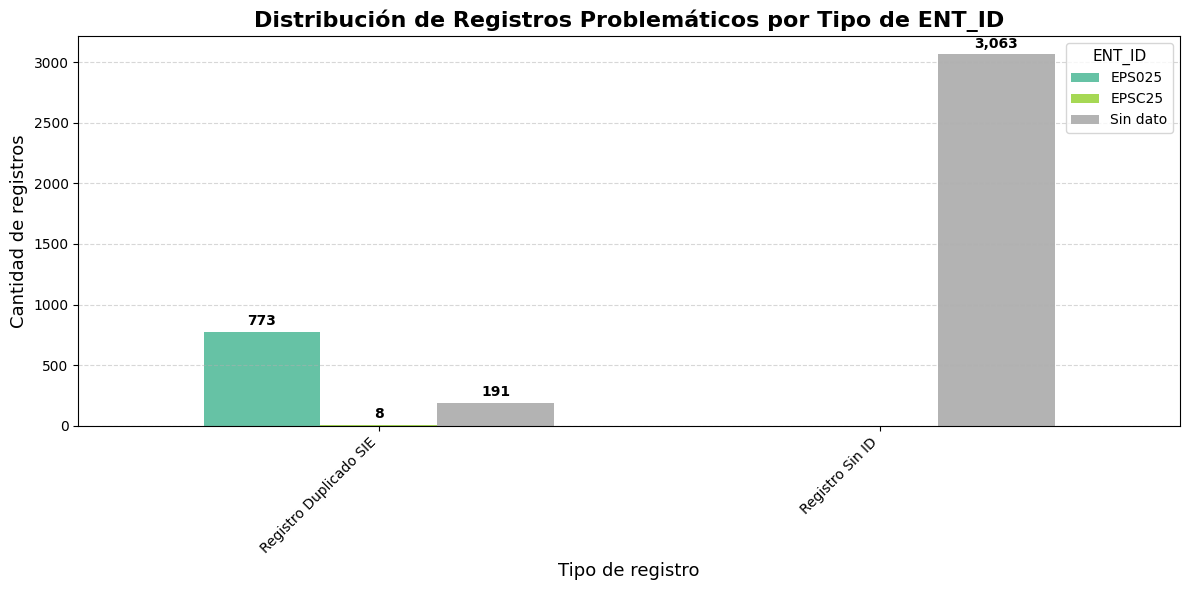

In [31]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Asegurar que ENT_ID no tenga valores nulos
Df_SIE["ENT_ID"] = Df_SIE["ENT_ID"].fillna("Sin dato")

# Agrupar por Validar_Duplicidad y ENT_ID
conteo = Df_SIE.groupby(["Validar_Duplicidad", "ENT_ID"]).size().unstack(fill_value=0)

# Filtrar solo las categorías de interés en filas
categorias_interes = ["Registro Duplicado SIE", "Registro Sin ID"]
conteo_filtrado = conteo.loc[categorias_interes]

# Ordenar las columnas de forma personalizada si deseas
orden_columnas = ["EPS025", "EPSC25", "Sin dato"]
conteo_filtrado = conteo_filtrado[[col for col in orden_columnas if col in conteo_filtrado.columns]]

# Colores dinámicos
colores = cm.get_cmap('Set2', len(conteo_filtrado.columns)).colors

# Crear gráfico
ax = conteo_filtrado.plot(
    kind='bar',
    figsize=(12, 6),
    color=colores,
    width=0.7
)

# Títulos y etiquetas
plt.title("Distribución de Registros Problemáticos por Tipo de ENT_ID", fontsize=16, fontweight='bold')
plt.xlabel("Tipo de registro", fontsize=13)
plt.ylabel("Cantidad de registros", fontsize=13)
plt.xticks(rotation=45, ha='right')
plt.legend(title="ENT_ID", fontsize=10, title_fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Agregar etiquetas numéricas sobre las barras con precisión
for rect in ax.patches:
    height = rect.get_height()
    if height > 0:
        ax.text(
            rect.get_x() + rect.get_width() / 2,  # centro de la barra
            height + max(conteo_filtrado.values.flatten()) * 0.01,  # ligeramente encima
            f'{int(height):,}',  # formateado con coma si quieres: f"{height:,}"
            ha='center',
            va='bottom',
            fontweight='bold',
            fontsize=10
        )

plt.show()

## 2.2 Validar Estado SIE VS ADRES 

### 2.2.1 N14 Activo SIE, NO EXISTE  ADRES

In [32]:
# Lista de valores para los filtros
ent_id_valores = ["EPS025", "Sin dato"]
tps_est_afl_id_valores = ["RE", "SM", "SD", ""] # Ya incluye cadenas vacías

# Aplicar el filtro corregido
DF_Retirar = Df_SIE[
    (Df_SIE["estado"] == "AC") &
    (Df_SIE["regimen"] == "EPS025") &
    (Df_SIE["estado_traslado"] == "No Aplica") &
    (Df_SIE["ENT_ID"].isin(ent_id_valores)) &
    (
        # Condición para TPS_EST_AFL_ID: que esté en la lista O que sea nulo
        Df_SIE["TPS_EST_AFL_ID"].isin(tps_est_afl_id_valores) | 
        Df_SIE["TPS_EST_AFL_ID"].isnull()
    )
]

print("Número de registros:", DF_Retirar.shape[0])

Número de registros: 142


In [33]:
# --- Proceso para validar y corregir la columna de fecha ---

# 1. Intenta convertir la columna a formato de fecha.
#    Las fechas que no sigan el formato 'DD/MM/YYYY' se convertirán en NaT (Not a Time).
fechas_convertidas = pd.to_datetime(DF_Retirar["CND_AFL_FECHA_INICIO"], format='%d/%m/%Y', errors='coerce')

# 2. Obtiene la fecha de hoy para rellenar los valores inválidos.
hoy = pd.Timestamp.now()

# 3. Rellena los NaT (fechas inválidas) con la fecha de hoy.
fechas_corregidas = fechas_convertidas.fillna(hoy)

# 4. Asigna la columna corregida y formateada de vuelta al DataFrame.
#    Toda la columna quedará como texto en formato 'DD/MM/YYYY'.
DF_Retirar["CND_AFL_FECHA_INICIO"] = fechas_corregidas.dt.strftime('%d/%m/%Y')

# --- Fin del proceso de validación ---

# Construir el DataFrame df_N14 con los campos indicados.
df_N14 = pd.DataFrame({
    "NUM_SOLICITUD_NOVEDAD": list(range(1, len(DF_Retirar) + 1)),
    "ENT_ID": DF_Retirar["regimen"].tolist(),
    "TPS_IDN_ID": DF_Retirar["tipo_documento"].tolist(),
    "HST_IDN_NUMERO_IDENTIFICACION": DF_Retirar["numero_identificacion"].tolist(),
    "AFL_PRIMER_APELLIDO": DF_Retirar["primer_apellido"].tolist(),
    "AFL_SEGUNDO_APELLIDO": DF_Retirar["segundo_apellido"].tolist(),
    "AFL_PRIMER_NOMBRE": DF_Retirar["primer_nombre"].tolist(),
    "AFL_SEGUNDO_NOMBRE": DF_Retirar["segundo_nombre"].tolist(),
    "AFL_FECHA_NACIMIENTO": DF_Retirar["fecha_nacimiento"].tolist(),
    "DPR_ID": DF_Retirar["ID_COD_municipio"].str[:2].tolist(),
    "MNC_ID": DF_Retirar["ID_COD_municipio"].str[-3:].tolist(),
    "NOVEDAD": ["N14"] * len(DF_Retirar),
    "FECHA_NOVEDAD": DF_Retirar["CND_AFL_FECHA_INICIO"].tolist(),
    "COD_1_NOVEDAD": ["RE"] * len(DF_Retirar),
    "COD_2_NOVEDAD": ["4"] * len(DF_Retirar),
    "COD_3_NOVEDAD": ["" for _ in range(len(DF_Retirar))],
    "COD_4_NOVEDAD": ["" for _ in range(len(DF_Retirar))],
    "COD_5_NOVEDAD": ["" for _ in range(len(DF_Retirar))],
    "COD_6_NOVEDAD": ["" for _ in range(len(DF_Retirar))],
    "COD_7_NOVEDAD": ["" for _ in range(len(DF_Retirar))],
    "Motivo": ["Activos SIE: RE, DS, SM O NO ADRES "] * len(DF_Retirar),
})

print("Número de registros en DF_Retirar:", DF_Retirar.shape[0])
print("Número de registros en df_N14:", df_N14.shape[0])

Número de registros en DF_Retirar: 142
Número de registros en df_N14: 142


C:\Users\osmarrincon\AppData\Local\Temp\ipykernel_22660\3171808853.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Retirar["CND_AFL_FECHA_INICIO"] = fechas_corregidas.dt.strftime('%d/%m/%Y')


### 2.2.2 N09 Activo Retirado SIE, Fallecido ADRES

In [34]:
DF_Fallecidos = Df_SIE[
    (Df_SIE["estado"].isin(["AC", "RE"])) &
    #(Df_SIE["regimen"] == "EPS025") &
    (Df_SIE["estado_traslado"] == "No Aplica") &
    #(Df_SIE["ENT_ID"].isin(["EPS025", "EPSC25"])) &
    (Df_SIE["TPS_EST_AFL_ID"].isin(["AF"]))
]

print("Número de registros:", DF_Fallecidos.shape[0])

Número de registros: 13


In [35]:
# Seleccionar las columnas de DF_ADRES que se requieren para el nuevo dataframe
cols_adres = [
    "TPS_IDN_ID", "HST_IDN_NUMERO_IDENTIFICACION", "ENT_ID",
    "AFL_PRIMER_APELLIDO", "AFL_SEGUNDO_APELLIDO", "AFL_PRIMER_NOMBRE",
    "AFL_SEGUNDO_NOMBRE", "AFL_FECHA_NACIMIENTO", "DPR_ID",
    "MNC_ID", "CND_AFL_FECHA_INICIO"
]

# Realizamos merge de DF_Fallecidos con DF_ADRES usando el id: 
# DF_Fallecidos["tipo_documento"] corresponde a DF_ADRES["TPS_IDN_ID"]
# DF_Fallecidos["numero_identificacion"] corresponde a DF_ADRES["HST_IDN_NUMERO_IDENTIFICACION"]
df_merged = DF_Fallecidos.merge(
    DF_ADRES[cols_adres],
    left_on=["tipo_documento", "numero_identificacion"],
    right_on=["TPS_IDN_ID", "HST_IDN_NUMERO_IDENTIFICACION"],
    how="left",
    suffixes=("", "_adres")
)


# Construir el DataFrame df_N09 con los campos indicados.
df_N09 = pd.DataFrame({
    "NUM_SOLICITUD_NOVEDAD": list(range(1, len(df_merged) + 1)),
    "ENT_ID": df_merged["ENT_ID"].tolist(),
    "TPS_IDN_ID": df_merged["TPS_IDN_ID"].tolist(),
    "HST_IDN_NUMERO_IDENTIFICACION": df_merged["HST_IDN_NUMERO_IDENTIFICACION"].tolist(),
    "AFL_PRIMER_APELLIDO": df_merged["AFL_PRIMER_APELLIDO"].tolist(),
    "AFL_SEGUNDO_APELLIDO": df_merged["AFL_SEGUNDO_APELLIDO"].tolist(),
    "AFL_PRIMER_NOMBRE": df_merged["AFL_PRIMER_NOMBRE"].tolist(),
    "AFL_SEGUNDO_NOMBRE": df_merged["AFL_SEGUNDO_NOMBRE"].tolist(),
    "AFL_FECHA_NACIMIENTO": df_merged["AFL_FECHA_NACIMIENTO"].tolist(),
    "DPR_ID": df_merged["DPR_ID"].tolist(),
    "MNC_ID": df_merged["MNC_ID"].tolist(),
    "NOVEDAD": ["N09"] * len(df_merged),
    "FECHA_NOVEDAD": df_merged["CND_AFL_FECHA_INICIO"].tolist(),
    "COD_1_NOVEDAD": [""] * len(df_merged),
    "COD_2_NOVEDAD": [""] * len(df_merged),
    "COD_3_NOVEDAD": ["" for _ in range(len(df_merged))],
    "COD_4_NOVEDAD": ["" for _ in range(len(df_merged))],
    "COD_5_NOVEDAD": ["" for _ in range(len(df_merged))],
    "COD_6_NOVEDAD": ["" for _ in range(len(df_merged))],
    "COD_7_NOVEDAD": ["" for _ in range(len(df_merged))],
    "Motivo": ["Activos SIE: AF ADRES "] * len(df_merged),
})

print("Número de registros en DF_Fallecidos:", DF_Fallecidos.shape[0])
print("Número de registros en df_N09:", df_N09.shape[0])

Número de registros en DF_Fallecidos: 13
Número de registros en df_N09: 13


### 2.2.2 activo SIE, No existe en ADRES con nosotros

In [36]:
mask = (
    ((Df_SIE["AFL_ID"].isna()) | (Df_SIE["AFL_ID"] == "")) &
    (Df_SIE["estado"] == "AC") &
    (Df_SIE["regimen"] == "EPS025") &
    (~Df_SIE["ENT_ID"].isin(["EPS025", "EPSC25"])) &
    (Df_SIE["estado_traslado"] == "No Aplica")
)

# 2. Define la lista de columnas que quieres conservar en el nuevo df
cols = [
    "regimen",
    "tipo_documento",
    "numero_identificacion",
    "primer_apellido",
    "segundo_apellido",
    "primer_nombre",
    "segundo_nombre",
    "fecha_nacimiento",
    "municipio",
    "AFL_ID"
]
# 3. Aplica el filtro y selecciona solo las columnas deseadas
DF_Retirar = Df_SIE.loc[mask, cols].copy()
print("Número de registros en DF_Retirar:", DF_Retirar.shape[0])

Número de registros en DF_Retirar: 29


Identifico que usuarios del SIE no cruzan con historico de identificación y por ende no tienen ID_BDUA y estan Activos en SIE

In [37]:
Df_sin_AFL_ID = Df_SIE[
    ((Df_SIE["AFL_ID"].isna()) | (Df_SIE["AFL_ID"] == "")) &
    (Df_SIE["estado"] == "AC") &
    (Df_SIE["regimen"] == "EPS025") &
    (~Df_SIE["ENT_ID"].isin(["EPS025", "EPSC25"])) &
    (Df_SIE["estado_traslado"] == "No Aplica")
    ]
print("Número de registros en DF_Retirar:", Df_sin_AFL_ID.shape[0])

Número de registros en DF_Retirar: 29


## 2.3 Validar I02[ Serial] SIE

In [38]:
# 1. Define la lista de columnas que quieres conservar en el nuevo df
cols = [
    "regimen",
    "tipo_documento",
    "numero_identificacion",
    "primer_apellido",
    "segundo_apellido",
    "primer_nombre",
    "segundo_nombre",
    "fecha_nacimiento",
    "municipio",
    "AFL_ID"
]

# 2. Construye la máscara de filtrado
mask = (
    # AFL_ID no es nulo
    Df_SIE["AFL_ID"].notna()
    # AFL_ID no está vacío (por si hay cadenas vacías o solo espacios)
    & (Df_SIE["AFL_ID"].astype(str).str.strip() != "")
    # serial_fosyga y AFL_ID son distintos
    & (Df_SIE["serial_fosyga"] != Df_SIE["AFL_ID"])
)

# 3. Aplica el filtro y selecciona solo las columnas deseadas
df_I02 = Df_SIE.loc[mask, cols].copy()

# 4. (Opcional) Reinicia el índice del nuevo DataFrame
df_I02.reset_index(drop=True, inplace=True)

# Ya lo tienes:
print(df_I02.shape)

(567, 10)


In [39]:
import pandas as pd
from datetime import datetime

# 1. Inserta 'NUM_SOLICITUD_NOVEDAD' como primera columna, con valores 1…n
df_I02.insert(
    loc=0,
    column="NUM_SOLICITUD_NOVEDAD",
    value=range(1, len(df_I02) + 1)
)

# 2. Sustituye en 'regimen'
df_I02["regimen"] = df_I02["regimen"].replace({
    "Subsidiado": "EPS025",
    "Contributivo": "EPSC25"
})

# 3. Renombra 'AFL_ID' a 'COD_1_NOVEDAD'
df_I02 = df_I02.rename(columns={"AFL_ID": "COD_1_NOVEDAD"})

# 4. Crea las nuevas columnas (todas al final por ahora)
df_I02["DPR_ID"]         = ""                             # vacía
df_I02["MNC_ID"]         = ""                             # vacía
df_I02["NOVEDAD"]        = "I02"                          # valor fijo
df_I02["FECHA_NOVEDAD"]  = datetime.now().strftime("%d/%m/%Y")
# Columnas COD_2_NOVEDAD … COD_7_NOVEDAD vacías
for i in range(2, 8):
    df_I02[f"COD_{i}_NOVEDAD"] = ""

# 5. Reordena para obtener exactamente las 20 columnas en el orden pedido
df_I02 = df_I02[
    [
        "NUM_SOLICITUD_NOVEDAD",
        "regimen",
        "tipo_documento",
        "numero_identificacion",
        "primer_apellido",
        "segundo_apellido",
        "primer_nombre",
        "segundo_nombre",
        "fecha_nacimiento",
        "DPR_ID",
        "MNC_ID",
        "NOVEDAD",
        "FECHA_NOVEDAD",
        "COD_1_NOVEDAD",
        "COD_2_NOVEDAD",
        "COD_3_NOVEDAD",
        "COD_4_NOVEDAD",
        "COD_5_NOVEDAD",
        "COD_6_NOVEDAD",
        "COD_7_NOVEDAD",
        "municipio"
    ]
]
# 6. Convierte a datetime (ajusta el formato si ya viene como cadena):
df_I02['fecha_nacimiento'] = pd.to_datetime(
    df_I02['fecha_nacimiento'],
    format='%Y-%m-%d',      # o el formato que realmente tengas; quita este argumento si varía
    errors='coerce'         # convierte lo que no encaje en NaT
)
# 7. Ahora formatea al string DD/MM/YYYY:
df_I02['fecha_nacimiento'] = df_I02['fecha_nacimiento'].dt.strftime('%d/%m/%Y')
# Listo: ahora `df_I02` tiene 20 columnas en el orden y con los valores solicitados.
print(df_I02.columns.tolist())

['NUM_SOLICITUD_NOVEDAD', 'regimen', 'tipo_documento', 'numero_identificacion', 'primer_apellido', 'segundo_apellido', 'primer_nombre', 'segundo_nombre', 'fecha_nacimiento', 'DPR_ID', 'MNC_ID', 'NOVEDAD', 'FECHA_NOVEDAD', 'COD_1_NOVEDAD', 'COD_2_NOVEDAD', 'COD_3_NOVEDAD', 'COD_4_NOVEDAD', 'COD_5_NOVEDAD', 'COD_6_NOVEDAD', 'COD_7_NOVEDAD', 'municipio']


In [40]:
# Realizar merge entre df_I02 y df_Municipios_SIE
# Suponemos que en df_I02 la columna que contiene el id es "municipio"
df_I02 = df_I02.merge(
    df_Municipios_SIE[["descripcion", "municipio"]],
    how="left",
    left_on="municipio",
    right_on="descripcion"
)

# Por el merge, la columna de df_Municipios_SIE se renombrará a "municipio_y" y la original en df_I02 es "municipio_x".
# Usamos la columna "municipio_y" para extraer el código.
df_I02["DPR_ID"] = df_I02["municipio_y"].str[:2]    #Primeros dos dígitos: código del departamento
df_I02["MNC_ID"] = df_I02["municipio_y"].str[2:]    #Últimos tres dígitos: código del municipio

## 2.4 Validar Grupos Familiares

In [41]:
# asumimos que Df_SIE ya tiene estas cuatro columnas:
#   SIE: tipo_documento_padre, numero_documento_padre
#   ADRES: TPS_IDN_ID_CF, HST_IDN_NUMERO_IDENTIFICACION_CF

# 1) Normaliza los “vacíos” para unificar: conviértelos a np.nan
for c in ["tipo_documento_padre", "numero_documento_padre",
          "TPS_IDN_ID_CF", "HST_IDN_NUMERO_IDENTIFICACION_CF"]:
    Df_SIE[c] = Df_SIE[c].replace("", np.nan)

# 2) Prepara las condiciones en orden
condiciones = [
    # todos vacíos → es el mismo afiliado, o sea, "él" es cabeza
    Df_SIE[["tipo_documento_padre", "numero_documento_padre",
            "TPS_IDN_ID_CF", "HST_IDN_NUMERO_IDENTIFICACION_CF"]]
      .isna().all(axis=1),
    # ambos lados tienen valor y coinciden
    Df_SIE["tipo_documento_padre"].notna() &
    Df_SIE["TPS_IDN_ID_CF"].notna() &
    (Df_SIE["tipo_documento_padre"] == Df_SIE["TPS_IDN_ID_CF"]) &
    (Df_SIE["numero_documento_padre"] == Df_SIE["HST_IDN_NUMERO_IDENTIFICACION_CF"]),
    # ambos lados tienen valor pero NO coinciden
    Df_SIE["tipo_documento_padre"].notna() &
    Df_SIE["TPS_IDN_ID_CF"].notna() &
    ((Df_SIE["tipo_documento_padre"] != Df_SIE["TPS_IDN_ID_CF"]) |
     (Df_SIE["numero_documento_padre"] != Df_SIE["HST_IDN_NUMERO_IDENTIFICACION_CF"])),
    # SIE tiene CF, ADRES no
    Df_SIE["tipo_documento_padre"].notna() &
    Df_SIE["TPS_IDN_ID_CF"].isna(),
    # ADRES tiene CF, SIE no
    Df_SIE["tipo_documento_padre"].isna() &
    Df_SIE["TPS_IDN_ID_CF"].notna()
]

resultados = [
    "Es Cabeza de familia",
    "Cabeza de familia igual en SIE y en ADRES",
    "Cabeza de familia diferente en SIE y en ADRES",
    "SIE con cabeza familiar, ADRES sin cabeza de familia",
    "ADRES con cabeza de familia, SIE sin cabeza de familia"
]

# 3) Crea la columna Validar_CF con np.select
Df_SIE["Validar_CF"] = np.select(condiciones, resultados, default="—sin clasificar—")

# 4) Imprimir cuántos registros hay por cada categoría en la columna Validar_CF
conteos = Df_SIE["Validar_CF"].value_counts()

print("Distribución de la validación de cabezas de familia:")
for categoria, cantidad in conteos.items():
    print(f"  {categoria}: {cantidad}")


Distribución de la validación de cabezas de familia:
  Es Cabeza de familia: 174740
  SIE con cabeza familiar, ADRES sin cabeza de familia: 30545
  Cabeza de familia igual en SIE y en ADRES: 20408
  ADRES con cabeza de familia, SIE sin cabeza de familia: 197
  Cabeza de familia diferente en SIE y en ADRES: 131


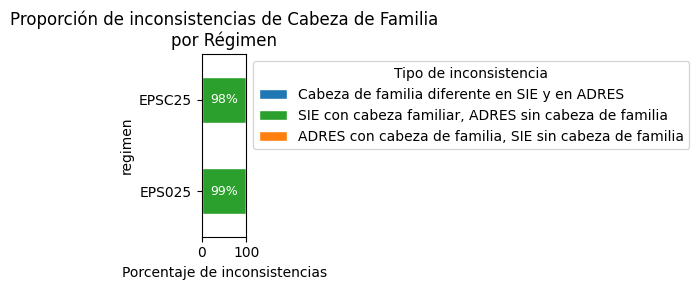

In [42]:
import matplotlib.pyplot as plt

# Crear tabla pivote para contar las inconsistencias por régimen
counts = pd.pivot_table(
    Df_SIE,
    index="regimen",
    columns="Validar_CF",
    values="AFL_ID",  # cualquier columna sirve para contar
    aggfunc="count",
    fill_value=0
)

# Simplificar seleccionando solo las categorías de interés
categorias_interes = [
    "Cabeza de familia diferente en SIE y en ADRES",
    "SIE con cabeza familiar, ADRES sin cabeza de familia",
    "ADRES con cabeza de familia, SIE sin cabeza de familia"
]
counts = counts[categorias_interes]

# 1) Calculamos proporciones
pct = counts.div(counts.sum(axis=1), axis=0) * 100

# 2) Dibujamos barras apiladas al 100%
fig, ax = plt.subplots(figsize=(6, 3))
pct.plot(
    kind="barh",
    stacked=True,
    ax=ax,
    color=["C0","C2","C1"],
    edgecolor="white",
)
# 3) Etiquetas de porcentaje en cada segmento
for i, regimen in enumerate(pct.index):
    left = 0
    for cat in pct.columns:
        w = pct.loc[regimen, cat]
        if w > 5:  # sólo anotar donde haya suficiente espacio
            ax.text(
                left + w/2, i,
                f"{w:.0f}%",
                va="center", ha="center",
                color="white", fontsize=9
            )
        left += w

# 4) Ajustes
ax.set_xlim(0,100)
ax.set_xlabel("Porcentaje de inconsistencias")
ax.set_title("Proporción de inconsistencias de Cabeza de Familia\npor Régimen")
ax.legend(title="Tipo de inconsistencia", bbox_to_anchor=(1,1), loc="upper left")
plt.tight_layout()
plt.show()

## 2.5. N01 Tipo de documento diferente
Evoluciones efectivas en ADRES y no en SIE

In [43]:
# 1. Filtrar los registros donde tipo_documento y TPS_IDN_ID son diferentes y TPS_IDN_ID no está vacío
mask = (
    (Df_SIE["tipo_documento"] != Df_SIE["TPS_IDN_ID"]) &
    (Df_SIE["TPS_IDN_ID"].notna()) &
    (Df_SIE["Validar_Duplicidad"].astype(str).str.strip() == "Registro unico SIE") &
    (Df_SIE["TPS_IDN_ID"].astype(str).str.strip() != "")
)

# 2. Seleccionar y renombrar las columnas necesarias
df_tmp = Df_SIE.loc[mask, [
    "ENT_ID", "tipo_documento", "numero_identificacion", "primer_apellido",
    "segundo_apellido", "primer_nombre", "segundo_nombre", "fecha_nacimiento",
    "ID_COD_municipio", "TPS_IDN_ID", "HST_IDN_NUMERO_IDENTIFICACION",
    "AFL_FECHA_NACIMIENTO"
]].copy()

# 3. Separar ID_COD_municipio en DPR_ID y MNC_ID
df_tmp["DPR_ID"] = df_tmp["ID_COD_municipio"].str[:2]
df_tmp["MNC_ID"] = df_tmp["ID_COD_municipio"].str[2:]

# 4. Insertar columnas fijas
df_tmp["NOVEDAD"] = "N01"
df_tmp["CND_AFL_FECHA_INICIO"] = datetime.now().strftime("%d/%m/%Y")

# 5. Reordenar columnas según lo solicitado
df_N01 = pd.DataFrame({
    "NUM_SOLICITUD_NOVEDAD": range(1, len(df_tmp) + 1),
    "ENT_ID": df_tmp["ENT_ID"],
    "TPS_IDN_ID": df_tmp["tipo_documento"],
    "HST_IDN_NUMERO_IDENTIFICACION": df_tmp["numero_identificacion"],
    "AFL_PRIMER_APELLIDO": df_tmp["primer_apellido"],
    "AFL_SEGUNDO_APELLIDO": df_tmp["segundo_apellido"],
    "AFL_PRIMER_NOMBRE": df_tmp["primer_nombre"],
    "AFL_SEGUNDO_NOMBRE": df_tmp["segundo_nombre"],
    "AFL_FECHA_NACIMIENTO": df_tmp["fecha_nacimiento"],
    "DPR_ID": df_tmp["DPR_ID"],
    "MNC_ID": df_tmp["MNC_ID"],
    "NOVEDAD": df_tmp["NOVEDAD"],
    "CND_AFL_FECHA_INICIO": df_tmp["CND_AFL_FECHA_INICIO"],
    "COD_1_NOVEDAD": df_tmp["TPS_IDN_ID"],
    "COD_2_NOVEDAD": df_tmp["HST_IDN_NUMERO_IDENTIFICACION"],
    "COD_3_NOVEDAD": df_tmp["AFL_FECHA_NACIMIENTO"],
    "COD_4_NOVEDAD": "0",
    "COD_5_NOVEDAD": "",
    "COD_6_NOVEDAD": "",
    "COD_7_NOVEDAD": "",
    "Motivo": "Evolucion de documento SIE"
})

# 6. (Opcional) Revisar el resultado
print(df_N01.head())
print(df_N01.shape)

      NUM_SOLICITUD_NOVEDAD  ENT_ID TPS_IDN_ID HST_IDN_NUMERO_IDENTIFICACION  \
545                       1  EPS025         TI                    1029648113   
7768                      2  EPS025         TI                    1115854488   
8262                      3  EPSC25         TI                    1118120923   
9092                      4  EPSC25         TI                    1116545214   
9273                      5  EPS025         CN                25109610349822   

     AFL_PRIMER_APELLIDO AFL_SEGUNDO_APELLIDO AFL_PRIMER_NOMBRE  \
545              ACHAGUA               TORRES            JAIMIR   
7768            CASTILLO               CURCHO           MARIANA   
8262            GORDILLO             GARAVITO            JAIDER   
9092             ALFONSO              BARRERA            BRAYAN   
9273            PASTRANA               FRANCO           HIJO DE   

     AFL_SEGUNDO_NOMBRE AFL_FECHA_NACIMIENTO DPR_ID  ... NOVEDAD  \
545                 NaN           29/08/2007    

## 2.6. N02 Nombres
Actualización o corrección de nombres del afiliado.

In [44]:
# 1. Filtrar los registros donde primer_nombre y AFL_PRIMER_NOMBRE son diferentes y AFL_PRIMER_NOMBRE no está vacío
import numpy as np

def nombres_iguales(row):
    # Si no hay datos ADRES
    if pd.isnull(row["TPS_EST_AFL_ID"]) or str(row["TPS_EST_AFL_ID"]).strip() == "":
        return "sin Datos ADRES"
    # Si ambos nombres son vacíos o nulos
    if (pd.isnull(row["primer_nombre"]) or str(row["primer_nombre"]).strip() == "") and \
       (pd.isnull(row["AFL_PRIMER_NOMBRE"]) or str(row["AFL_PRIMER_NOMBRE"]).strip() == "") and \
       (pd.isnull(row["segundo_nombre"]) or str(row["segundo_nombre"]).strip() == "") and \
       (pd.isnull(row["AFL_SEGUNDO_NOMBRE"]) or str(row["AFL_SEGUNDO_NOMBRE"]).strip() == ""):
        return "Nombres iguales"
    # Comparación normal
    if (str(row["primer_nombre"]).lower().strip() != str(row["AFL_PRIMER_NOMBRE"]).lower().strip()) or \
       (str(row["segundo_nombre"]).lower().strip() != str(row["AFL_SEGUNDO_NOMBRE"]).lower().strip()):
        return "Nombres diferentes"
    return "Nombres iguales"

Df_SIE["Validar_nombres"] = Df_SIE.apply(nombres_iguales, axis=1)


mask = (
    (Df_SIE["Validar_nombres"].astype(str).str.strip() == "Nombres diferentes") &
    (Df_SIE["Validar_Duplicidad"].astype(str).str.strip() == "Registro unico SIE") &
    (Df_SIE["TPS_IDN_ID"].astype(str).str.strip() != "") &
    # El registro es válido solo si las 2 columnas son diferentes a "CN"
    (
		(Df_SIE["tipo_documento"].astype(str).str.strip().str.upper() != "CN") &
		(Df_SIE["TPS_IDN_ID"].astype(str).str.strip().str.upper() != "CN")
	)
)

# 2. Seleccionar y renombrar las columnas necesarias
df_tmp = Df_SIE.loc[mask, [
    "ENT_ID", "tipo_documento", "numero_identificacion", "primer_apellido",
    "segundo_apellido", "primer_nombre", "segundo_nombre", "fecha_nacimiento",
    "ID_COD_municipio", "AFL_PRIMER_NOMBRE", "AFL_SEGUNDO_NOMBRE"
]].copy()

# 3. Separar ID_COD_municipio en DPR_ID y MNC_ID
df_tmp["DPR_ID"] = df_tmp["ID_COD_municipio"].str[:2]
df_tmp["MNC_ID"] = df_tmp["ID_COD_municipio"].str[2:]

# 4. Insertar columnas fijas
df_tmp["NOVEDAD"] = "N02"
df_tmp["CND_AFL_FECHA_INICIO"] = datetime.now().strftime("%d/%m/%Y")

# 5. Reordenar columnas según lo solicitado
df_N02 = pd.DataFrame({
    "NUM_SOLICITUD_NOVEDAD": range(1, len(df_tmp) + 1),
    "ENT_ID": df_tmp["ENT_ID"],
    "TPS_IDN_ID": df_tmp["tipo_documento"],
    "HST_IDN_NUMERO_IDENTIFICACION": df_tmp["numero_identificacion"],
    "AFL_PRIMER_APELLIDO": df_tmp["primer_apellido"],
    "AFL_SEGUNDO_APELLIDO": df_tmp["segundo_apellido"],
    "AFL_PRIMER_NOMBRE": df_tmp["primer_nombre"],
    "AFL_SEGUNDO_NOMBRE": df_tmp["segundo_nombre"],
    "AFL_FECHA_NACIMIENTO": df_tmp["fecha_nacimiento"],
    "DPR_ID": df_tmp["DPR_ID"],
    "MNC_ID": df_tmp["MNC_ID"],
    "NOVEDAD": df_tmp["NOVEDAD"],
    "CND_AFL_FECHA_INICIO": df_tmp["CND_AFL_FECHA_INICIO"],
    "COD_1_NOVEDAD": df_tmp["AFL_PRIMER_NOMBRE"],
    "COD_2_NOVEDAD": df_tmp["AFL_SEGUNDO_NOMBRE"],
    "COD_3_NOVEDAD": "",
    "COD_4_NOVEDAD": "",
    "COD_5_NOVEDAD": "",
    "COD_6_NOVEDAD": "",
    "COD_7_NOVEDAD": "",
    "Motivo": "Corrección nombres SIE"
})

# 6. (Opcional) Revisar el resultado
print(df_N02.head())
print(df_N02.shape)

      NUM_SOLICITUD_NOVEDAD  ENT_ID TPS_IDN_ID HST_IDN_NUMERO_IDENTIFICACION  \
3383                      1  EPS025         RC                    1115692857   
4568                      2  EPSC25         CC                      33625213   
4638                      3  EPS025         PT                       5205188   
8567                      4  EPS025         RC                    1118583609   
8681                      5  EPS025         PT                       5015555   

     AFL_PRIMER_APELLIDO AFL_SEGUNDO_APELLIDO AFL_PRIMER_NOMBRE  \
3383              CATAÑO               CATAÑO            AILANY   
4568               ROJAS                MUÑOZ             NUBIA   
4638               TIAPA                  NaN           NOREXIS   
8567              ESLAVA            SOLORZANO          EMMANUEL   
8681           FIGUEREDO              SANCHEZ          FERNANDO   

     AFL_SEGUNDO_NOMBRE AFL_FECHA_NACIMIENTO DPR_ID  ... NOVEDAD  \
3383             AYELEN           23/07/2025    

## 2.7. N03 Apellidos
Actualización o corrección de apellidos del afiliado.

In [45]:
# 1. Filtrar los registros donde primer_apellido y AFL_PRIMER_APELLIDO son diferentes y AFL_PRIMER_APELLIDO no está vacío
import numpy as np

def apellidos_iguales(row):
    # Si no hay datos ADRES
    if pd.isnull(row["TPS_EST_AFL_ID"]) or str(row["TPS_EST_AFL_ID"]).strip() == "":
        return "sin Datos ADRES"
    # Si ambos apellidos son vacíos o nulos
    if (pd.isnull(row["primer_apellido"]) or str(row["primer_apellido"]).strip() == "") and \
       (pd.isnull(row["AFL_PRIMER_APELLIDO"]) or str(row["AFL_PRIMER_APELLIDO"]).strip() == "") and \
       (pd.isnull(row["segundo_apellido"]) or str(row["segundo_apellido"]).strip() == "") and \
       (pd.isnull(row["AFL_SEGUNDO_APELLIDO"]) or str(row["AFL_SEGUNDO_APELLIDO"]).strip() == ""):
        return "Apellidos iguales"
    # Comparación normal
    if (str(row["primer_apellido"]).lower().strip() != str(row["AFL_PRIMER_APELLIDO"]).lower().strip()) or \
       (str(row["segundo_apellido"]).lower().strip() != str(row["AFL_SEGUNDO_APELLIDO"]).lower().strip()):
        return "Apellidos diferentes"
    return "Apellidos iguales"

Df_SIE["Validar_apellidos"] = Df_SIE.apply(apellidos_iguales, axis=1)
mask = (
    (Df_SIE["Validar_apellidos"].astype(str).str.strip() == "Apellidos diferentes") &
    (Df_SIE["Validar_Duplicidad"].astype(str).str.strip() == "Registro unico SIE") &
    # El registro es válido solo si las 2 columnas son diferentes a "CN"
    (
		(Df_SIE["tipo_documento"].astype(str).str.strip().str.upper() != "CN") &
		(Df_SIE["TPS_IDN_ID"].astype(str).str.strip().str.upper() != "CN")
	)
)

# 2. Seleccionar y renombrar las columnas necesarias
df_tmp = Df_SIE.loc[mask, [
    "ENT_ID", "tipo_documento", "numero_identificacion", "primer_apellido",
    "segundo_apellido", "primer_nombre", "segundo_nombre", "fecha_nacimiento",
    "ID_COD_municipio", "AFL_PRIMER_APELLIDO", "AFL_SEGUNDO_APELLIDO"
]].copy()

# 3. Separar ID_COD_municipio en DPR_ID y MNC_ID
df_tmp["DPR_ID"] = df_tmp["ID_COD_municipio"].str[:2]
df_tmp["MNC_ID"] = df_tmp["ID_COD_municipio"].str[2:]

# 4. Insertar columnas fijas
df_tmp["NOVEDAD"] = "N03"
df_tmp["CND_AFL_FECHA_INICIO"] = datetime.now().strftime("%d/%m/%Y")

# 5. Reordenar columnas según lo solicitado
df_N03 = pd.DataFrame({
    "NUM_SOLICITUD_NOVEDAD": range(1, len(df_tmp) + 1),
    "ENT_ID": df_tmp["ENT_ID"],
    "TPS_IDN_ID": df_tmp["tipo_documento"],
    "HST_IDN_NUMERO_IDENTIFICACION": df_tmp["numero_identificacion"],
    "AFL_PRIMER_APELLIDO": df_tmp["primer_apellido"],
    "AFL_SEGUNDO_APELLIDO": df_tmp["segundo_apellido"],
    "AFL_PRIMER_NOMBRE": df_tmp["primer_nombre"],
    "AFL_SEGUNDO_NOMBRE": df_tmp["segundo_nombre"],
    "AFL_FECHA_NACIMIENTO": df_tmp["fecha_nacimiento"],
    "DPR_ID": df_tmp["DPR_ID"],
    "MNC_ID": df_tmp["MNC_ID"],
    "NOVEDAD": df_tmp["NOVEDAD"],
    "CND_AFL_FECHA_INICIO": df_tmp["CND_AFL_FECHA_INICIO"],
    "COD_1_NOVEDAD": df_tmp["AFL_PRIMER_APELLIDO"],
    "COD_2_NOVEDAD": df_tmp["AFL_SEGUNDO_APELLIDO"],
    "COD_3_NOVEDAD": "",
    "COD_4_NOVEDAD": "",
    "COD_5_NOVEDAD": "",
    "COD_6_NOVEDAD": "",
    "COD_7_NOVEDAD": "",
    "Motivo": "Corrección apellidos SIE"
})

# 6. (Opcional) Revisar el resultado
print(df_N03.head())
print(df_N03.shape)

      NUM_SOLICITUD_NOVEDAD  ENT_ID TPS_IDN_ID HST_IDN_NUMERO_IDENTIFICACION  \
1591                      1  EPS025         CC                      80387964   
3108                      2  EPSC25         TI                    1115915409   
6735                      3  EPS025         RC                    1222147836   
7233                      4  EPS025         RC                    1115920158   
7658                      5  EPS025         RC                    1118127339   

     AFL_PRIMER_APELLIDO AFL_SEGUNDO_APELLIDO AFL_PRIMER_NOMBRE  \
1591           SALAMANCA                PEÃ‘A           YEISSON   
3108               LOPEZ                LEMUS            DANIEL   
6735                LEON              HURTADO          LUISSANA   
7233           VELASQUEZ                TOVAR              ALAN   
7658              ARENAS                LOPEZ             HELEN   

     AFL_SEGUNDO_NOMBRE AFL_FECHA_NACIMIENTO DPR_ID  ... NOVEDAD  \
1591                ALI           25/12/1982    

## 2.8. N21 sisben

In [46]:
# 1. Filtrar los registros donde primer_apellido y AFL_PRIMER_APELLIDO son diferentes y AFL_PRIMER_APELLIDO no está vacío
import pandas as pd

def validar_sisben(row):
    tps_grp = str(row.get("TPS_GRP_PBL_ID", "")).strip()
    sub_sisben = str(row.get("SUB_SISBEN_IV", "")).strip()
    # Si no hay datos ADRES
    if pd.isnull(row.get("TPS_EST_AFL_ID")) or str(row.get("TPS_EST_AFL_ID")).strip() == "":
        return "sin Datos ADRES"
    # Si TPS_GRP_PBL_ID es "5"
    if tps_grp == "5":
        # Si SUB_SISBEN_IV es vacío, espacio o nulo
        if pd.isnull(row.get("SUB_SISBEN_IV")) or sub_sisben == "":
            return "SSIBEN III"
        # Comparar subgrupo y SUB_SISBEN_IV
        if str(row.get("subgrupo", "")).strip() == sub_sisben:
            return "sisben igual"
        else:
            return "Sisben Diferente"
    # Si TPS_GRP_PBL_ID es "31" o "34"
    if tps_grp in ["31", "34"]:
        return "afiliación oficion o contribución solidaria"
    # Comparar grupo_poblacional y TPS_GRP_PBL_ID
    if str(row.get("grupo_poblacional", "")).strip() == tps_grp:
        return "sisben igual"
    else:
        return "Sisben Diferente"

Df_SIE["Validar_Sisben"] = Df_SIE.apply(validar_sisben, axis=1)


mask = (
    (Df_SIE["Validar_Sisben"].astype(str).str.strip() == "Sisben Diferente") &
    (Df_SIE["Validar_Duplicidad"].astype(str).str.strip() == "Registro unico SIE") &
    (Df_SIE["TPS_GRP_PBL_ID"].notna()) &  # Verifica que no sea nulo (NaN)
    (Df_SIE["TPS_GRP_PBL_ID"].astype(str).str.strip().ne(""))  # Verifica que no sea vacío o solo espacios
)

# 2. Seleccionar y renombrar las columnas necesarias
df_tmp = Df_SIE.loc[mask, [
    "ENT_ID", "tipo_documento", "numero_identificacion", "primer_apellido",
    "segundo_apellido", "primer_nombre", "segundo_nombre", "fecha_nacimiento",
    "ID_COD_municipio", "TPS_GRP_PBL_ID", "SUB_SISBEN_IV"
]].copy()

# 3. Separar ID_COD_municipio en DPR_ID y MNC_ID
df_tmp["DPR_ID"] = df_tmp["ID_COD_municipio"].str[:2]
df_tmp["MNC_ID"] = df_tmp["ID_COD_municipio"].str[2:]

# 4. Insertar columnas fijas
df_tmp["NOVEDAD"] = "N21"
df_tmp["CND_AFL_FECHA_INICIO"] = datetime.now().strftime("%d/%m/%Y")

# 5. Reordenar columnas según lo solicitado
df_N21 = pd.DataFrame({
    "NUM_SOLICITUD_NOVEDAD": range(1, len(df_tmp) + 1),
    "ENT_ID": df_tmp["ENT_ID"],
    "TPS_IDN_ID": df_tmp["tipo_documento"],
    "HST_IDN_NUMERO_IDENTIFICACION": df_tmp["numero_identificacion"],
    "AFL_PRIMER_APELLIDO": df_tmp["primer_apellido"],
    "AFL_SEGUNDO_APELLIDO": df_tmp["segundo_apellido"],
    "AFL_PRIMER_NOMBRE": df_tmp["primer_nombre"],
    "AFL_SEGUNDO_NOMBRE": df_tmp["segundo_nombre"],
    "AFL_FECHA_NACIMIENTO": df_tmp["fecha_nacimiento"],
    "DPR_ID": df_tmp["DPR_ID"],
    "MNC_ID": df_tmp["MNC_ID"],
    "NOVEDAD": df_tmp["NOVEDAD"],
    "CND_AFL_FECHA_INICIO": df_tmp["CND_AFL_FECHA_INICIO"],
    "COD_1_NOVEDAD": "2",
    "COD_2_NOVEDAD": df_tmp["SUB_SISBEN_IV"],
    "COD_3_NOVEDAD": df_tmp["TPS_GRP_PBL_ID"],
    "COD_4_NOVEDAD": "",
    "COD_5_NOVEDAD": "",
    "COD_6_NOVEDAD": "",
    "COD_7_NOVEDAD": "",
    "Motivo": "Corrección sisben SIE"
})

def validar_novedades_N21(row):
    cod_3 = str(row["COD_3_NOVEDAD"]).strip()
    cod_2 = str(row["COD_2_NOVEDAD"]).strip()
    # Inicializar los valores
    cod_1, cod_4, cod_5, cod_6 = row["COD_1_NOVEDAD"], row["COD_4_NOVEDAD"], row["COD_5_NOVEDAD"], row["COD_6_NOVEDAD"]

    # Si COD_3_NOVEDAD es "5"
    if cod_3 == "5":
        # Validar rango de COD_2_NOVEDAD
        if cod_2[:1] in ["A", "B"]:
            cod_4 = "1"
        elif cod_2[:1] in ["C", "D"]:
            cod_4 = "2"
        cod_5 = "06"
    # Si COD_3_NOVEDAD es "17"
    elif cod_3 == "17":
        cod_1 = "3"
        cod_4 = "N"
        cod_5 = "01"
        cod_6 = "999"
    # Si COD_3_NOVEDAD es diferente de "5" y "17"
    else:
        cod_1 = "3"
        cod_4 = "N"
        cod_5 = "06"
    # Retornar los valores actualizados
    return pd.Series([cod_1, cod_4, cod_5, cod_6], index=["COD_1_NOVEDAD", "COD_4_NOVEDAD", "COD_5_NOVEDAD", "COD_6_NOVEDAD"])

# Aplicar la función al DataFrame
df_N21[["COD_1_NOVEDAD", "COD_4_NOVEDAD", "COD_5_NOVEDAD", "COD_6_NOVEDAD"]] = df_N21.apply(validar_novedades_N21, axis=1)

# 6. (Opcional) Revisar el resultado
print(df_N21.head())
print(df_N21.shape)

     NUM_SOLICITUD_NOVEDAD  ENT_ID TPS_IDN_ID HST_IDN_NUMERO_IDENTIFICACION  \
22                       1  EPS025         CC                    1116550318   
124                      2  EPS025         CC                    1006442206   
412                      3  EPS025         CC                    1116555368   
545                      4  EPS025         TI                    1029648113   
588                      5  EPS025         CC                      23794175   

    AFL_PRIMER_APELLIDO AFL_SEGUNDO_APELLIDO AFL_PRIMER_NOMBRE  \
22              ALFONSO          BALLESTEROS           CLAUDIA   
124           HERNANDEZ            HERNANDEZ             ANGIE   
412             RAMIREZ              QUEZADA            SHARON   
545             ACHAGUA               TORRES            JAIMIR   
588              TORRES              NARANJO            AUDREY   

    AFL_SEGUNDO_NOMBRE AFL_FECHA_NACIMIENTO DPR_ID  ... NOVEDAD  \
22            PATRICIA           14/01/1995     85  ...     N

## 2.4. I03 activar SIE

In [47]:
# Lista de estados de traslado que quieres filtrar
estados_a_filtrar = ["Pendiente Ingreso Traslado RS", "Pendiente Ingreso MS"]

# Aplicar las máscaras/filtros
mask = (
    (Df_SIE["estado_traslado"].isin(estados_a_filtrar)) &
    (Df_SIE["ENT_ID"] == "EPS025") &
    (Df_SIE["TPS_EST_AFL_ID"] == "AC")
)



In [48]:
# Seleccionar las columnas de DF_ADRES que se requieren para el nuevo dataframe
cols_adres = [
    "tipo_documento", "numero_identificacion", "ENT_ID",
    "primer_apellido", "segundo_apellido", "primer_nombre",
    "segundo_nombre", "fecha_nacimiento", "DPR_ID",
    "MNC_ID", "CND_AFL_FECHA_INICIO"
]
# 2. Seleccionar y renombrar las columnas necesarias
df_merged = Df_SIE.loc[mask, [
    "tipo_documento", "numero_identificacion", "ENT_ID",
    "primer_apellido", "segundo_apellido", "primer_nombre",
    "segundo_nombre", "fecha_nacimiento", "DPR_ID",
    "MNC_ID", "CND_AFL_FECHA_INICIO", "ID_COD_municipio"
]].copy()

# 3. Separar ID_COD_municipio en DPR_ID y MNC_ID
df_merged["DPR_ID"] = df_merged["ID_COD_municipio"].str[:2]
df_merged["MNC_ID"] = df_merged["ID_COD_municipio"].str[2:]

# Asegurarse de que "CND_AFL_FECHA_INICIO" sea una Serie unidimensional:
if isinstance(df_merged["CND_AFL_FECHA_INICIO"], pd.DataFrame):
    cnd_fecha = df_merged["CND_AFL_FECHA_INICIO"].iloc[:, 0]
else:
    cnd_fecha = df_merged["CND_AFL_FECHA_INICIO"]

# Construir el DataFrame df_I03 con los campos indicados.
df_I03 = pd.DataFrame({
    "NUM_SOLICITUD_NOVEDAD": list(range(1, len(df_merged) + 1)),
    "ENT_ID": df_merged["ENT_ID"].tolist(),
    "TPS_IDN_ID": df_merged["tipo_documento"].tolist(),
    "HST_IDN_NUMERO_IDENTIFICACION": df_merged["numero_identificacion"].tolist(),
    "AFL_PRIMER_APELLIDO": df_merged["primer_apellido"].tolist(),
    "AFL_SEGUNDO_APELLIDO": df_merged["segundo_apellido"].tolist(),
    "AFL_PRIMER_NOMBRE": df_merged["primer_nombre"].tolist(),
    "AFL_SEGUNDO_NOMBRE": df_merged["segundo_nombre"].tolist(),
    "AFL_FECHA_NACIMIENTO": df_merged["fecha_nacimiento"].tolist(),
    "DPR_ID": df_merged["DPR_ID"].tolist(),
    "MNC_ID": df_merged["MNC_ID"].tolist(),
    "NOVEDAD": ["I03"] * len(df_merged),
    "FECHA_NOVEDAD": cnd_fecha.tolist(),
    "COD_1_NOVEDAD": ["AC"] * len(df_merged),
    "COD_2_NOVEDAD": [""] * len(df_merged),
    "COD_3_NOVEDAD": ["" for _ in range(len(df_merged))],
    "COD_4_NOVEDAD": ["" for _ in range(len(df_merged))],
    "COD_5_NOVEDAD": ["" for _ in range(len(df_merged))],
    "COD_6_NOVEDAD": ["" for _ in range(len(df_merged))],
    "COD_7_NOVEDAD": ["" for _ in range(len(df_merged))],
    "Motivo": ["Proceso traslado SIE EPS025: AC, EPS025 ADRES "] * len(df_merged),
})

print("Número de registros en df_I03:", df_I03.shape[0])

Número de registros en df_I03: 121


## 2.3.1 Reportar evolucion a ADRES.
Validando que en SIE el tipo de documento este bien pero no en ADRES. para identificar los afiliados y reportarlos ante ADRES.

In [49]:
# Definir los pares de evolución válidos
evoluciones_validas = {
    ("CN", "RC"),
    ("RC", "TI"),
    ("TI", "CC"),
    ("PE", "PT"),
}

# Verificar cuántos registros son inconsistentes
print(f"Total de registros: {len(df_N01)}")

# 1. Detectar registros con evolución actual VÁLIDA
mask_evolucion_valida = df_N01.apply(
    lambda row: (row["TPS_IDN_ID"], row["COD_1_NOVEDAD"]) in evoluciones_validas,
    axis=1
)

# 2. Detectar registros con evolución actual INVÁLIDA
mask_evolucion_invalida = ~mask_evolucion_valida

# 3. De los inválidos, detectar cuáles se pueden corregir intercambiando
mask_corregible_intercambiando = df_N01.apply(
    lambda row: (row["COD_1_NOVEDAD"], row["TPS_IDN_ID"]) in evoluciones_validas,
    axis=1
)

# 4. Máscara final: registros inválidos que se pueden corregir intercambiando
mask_a_intercambiar = mask_evolucion_invalida & mask_corregible_intercambiando

print(f"Registros con evolución válida: {mask_evolucion_valida.sum()}")
print(f"Registros con evolución inválida: {mask_evolucion_invalida.sum()}")
print(f"Registros inválidos que se pueden corregir intercambiando: {mask_a_intercambiar.sum()}")
print(f"Registros inválidos que NO se pueden corregir: {(mask_evolucion_invalida & ~mask_corregible_intercambiando).sum()}")

# 5. Intercambiar SOLO los registros que necesitan corrección
if mask_a_intercambiar.any():
    # Intercambiar valores
    df_N01.loc[mask_a_intercambiar, ["COD_1_NOVEDAD", "COD_2_NOVEDAD", "TPS_IDN_ID", "HST_IDN_NUMERO_IDENTIFICACION"]] = \
        df_N01.loc[mask_a_intercambiar, ["TPS_IDN_ID", "HST_IDN_NUMERO_IDENTIFICACION", "COD_1_NOVEDAD", "COD_2_NOVEDAD"]].values
    
    # Cambiar el motivo SOLO para estos registros
    df_N01.loc[mask_a_intercambiar, "Motivo"] = "Reportar novedad ante ADRES"
    
    print(f"Se intercambiaron {mask_a_intercambiar.sum()} registros para corregir evoluciones")
else:
    print("No se encontraron registros que requieran intercambio")

# Verificar los motivos después del cambio
print("\nDistribución de motivos:")
print(df_N01["Motivo"].value_counts())

# Verificación final: mostrar algunos ejemplos
print("\nEjemplos de evoluciones después del procesamiento:")
print("Evoluciones válidas (primeros 5):")
validas_final = df_N01[df_N01.apply(lambda row: (row["TPS_IDN_ID"], row["COD_1_NOVEDAD"]) in evoluciones_validas, axis=1)]
if len(validas_final) > 0:
    print(validas_final[["TPS_IDN_ID", "COD_1_NOVEDAD", "Motivo"]].head())

print("\nEvoluciones que siguen siendo inválidas:")
invalidas_final = df_N01[~df_N01.apply(lambda row: (row["TPS_IDN_ID"], row["COD_1_NOVEDAD"]) in evoluciones_validas, axis=1)]
if len(invalidas_final) > 0:
    print(invalidas_final[["TPS_IDN_ID", "COD_1_NOVEDAD", "Motivo"]].head())

Total de registros: 34
Registros con evolución válida: 34
Registros con evolución inválida: 0
Registros inválidos que se pueden corregir intercambiando: 0
Registros inválidos que NO se pueden corregir: 0
No se encontraron registros que requieran intercambio

Distribución de motivos:
Motivo
Evolucion de documento SIE    34
Name: count, dtype: int64

Ejemplos de evoluciones después del procesamiento:
Evoluciones válidas (primeros 5):
     TPS_IDN_ID COD_1_NOVEDAD                      Motivo
545          TI            CC  Evolucion de documento SIE
7768         TI            CC  Evolucion de documento SIE
8262         TI            CC  Evolucion de documento SIE
9092         TI            CC  Evolucion de documento SIE
9273         CN            RC  Evolucion de documento SIE

Evoluciones que siguen siendo inválidas:


## 2.5. ESPACIOS

In [50]:
import re

# Filtrar registros donde 'numero_identificacion' contiene espacios o caracteres no numéricos

# Expresión regular: busca espacios o cualquier carácter que no sea letra o número
mask_espacios = Df_SIE["numero_identificacion"].astype(str).str.contains(r"[^\w]", regex=True)

DF_ESPACIOS = Df_SIE[mask_espacios].copy()

print("Registros con espacios o caracteres especiales en 'numero_identificacion':", DF_ESPACIOS.shape[0])

Registros con espacios o caracteres especiales en 'numero_identificacion': 0


# 4. Guardar archivos

## 4.1. Carpeta N01

In [51]:
# Crear la subcarpeta "N01" dentro de R_Salida
output_folder = os.path.join(R_Salida, "N01")
Path(output_folder).mkdir(parents=True, exist_ok=True)
# Columnas a **no** incluir en el TXT
skip = ["Motivo"]
# Agrupar por la columna "DPR_ID" y guardar un TXT por cada grupo
for dpr, grupo in df_N01.groupby("DPR_ID"):
    filename = f"N01_{dpr}.TXT"
    output_file = os.path.join(output_folder, filename)
    grupo.drop(columns=skip).to_csv(
        output_file,
        sep=",",
        index=False,
        encoding="ANSI",
        header=None
    )

## 4.2. Carpeta N02

In [52]:
# Crear la subcarpeta "N02" dentro de R_Salida
output_folder = os.path.join(R_Salida, "N02")
Path(output_folder).mkdir(parents=True, exist_ok=True)
# Columnas a **no** incluir en el TXT
skip = ["Motivo"]
# Agrupar por la columna "DPR_ID" y guardar un TXT por cada grupo
for dpr, grupo in df_N02.groupby("DPR_ID"):
    filename = f"N02_{dpr}.TXT"
    output_file = os.path.join(output_folder, filename)
    grupo.drop(columns=skip).to_csv(
        output_file,
        sep=",",
        index=False,
        encoding="ANSI",
        header=None
    )

## 4.3. Carpeta N03

In [53]:
# Crear la subcarpeta "N03" dentro de R_Salida
output_folder = os.path.join(R_Salida, "N03")
Path(output_folder).mkdir(parents=True, exist_ok=True)
# Columnas a **no** incluir en el TXT
skip = ["Motivo"]
# Agrupar por la columna "DPR_ID" y guardar un TXT por cada grupo
for dpr, grupo in df_N03.groupby("DPR_ID"):
    filename = f"N03_{dpr}.TXT"
    output_file = os.path.join(output_folder, filename)
    grupo.drop(columns=skip).to_csv(
        output_file,
        sep=",",
        index=False,
        encoding="ANSI",
        header=None
    )

## 4.2. Carpeta N09

In [54]:
# Crear la subcarpeta "N09" dentro de R_Salida
output_folder = os.path.join(R_Salida, "N09")
Path(output_folder).mkdir(parents=True, exist_ok=True)
# Columnas a **no** incluir en el TXT
skip = ["Motivo"]
# Agrupar por la columna "DPR_ID" y guardar un TXT por cada grupo
for dpr, grupo in df_N09.groupby("DPR_ID"):
    filename = f"N09_{dpr}.TXT"
    output_file = os.path.join(output_folder, filename)
    grupo.drop(columns=skip).to_csv(
        output_file,
        sep=",",
        index=False,
        encoding="ANSI",
        header=None
    )

## 4.3. Carpeta N14

In [55]:
# Crear la subcarpeta "N14" dentro de R_Salida
output_folder = os.path.join(R_Salida, "N14")
Path(output_folder).mkdir(parents=True, exist_ok=True)
# Columnas a **no** incluir en el TXT
skip = ["Motivo"]
# Agrupar por la columna "DPR_ID" y guardar un TXT por cada grupo
for dpr, grupo in df_N14.groupby("DPR_ID"):
    filename = f"N14_{dpr}.TXT"
    output_file = os.path.join(output_folder, filename)
    grupo.drop(columns=skip).to_csv(
        output_file,
        sep=",",
        index=False,
        encoding="ANSI",
        header=None
    )

## 4.4. Carpeta N21 

In [56]:
# Crear la subcarpeta "N21" dentro de R_Salida
output_folder = os.path.join(R_Salida, "N21")
Path(output_folder).mkdir(parents=True, exist_ok=True)
# Columnas a **no** incluir en el TXT
skip = ["Motivo"]
# Agrupar por la columna "DPR_ID" y guardar un TXT por cada grupo
for dpr, grupo in df_N21.groupby("DPR_ID"):
    filename = f"N21_{dpr}.TXT"
    output_file = os.path.join(output_folder, filename)
    grupo.drop(columns=skip).to_csv(
        output_file,
        sep=",",
        index=False,
        encoding="ANSI",
        header=None
    )

## 4.4. Carpeta I02

In [57]:
# Crear la subcarpeta "I02" dentro de R_Salida
output_folder = os.path.join(R_Salida, "I02")
Path(output_folder).mkdir(parents=True, exist_ok=True)
# Columnas a **no** incluir en el TXT
skip = ["municipio_x", "descripcion", "municipio_y"]
for dpr, grupo in df_I02.groupby("DPR_ID"):
    filename    = f"I02_{dpr}.TXT"
    output_file = os.path.join(output_folder, filename)

    # Opción A: drop por parámetro
    grupo.drop(columns=skip).to_csv(
        output_file,
        sep=",",
        index=False,
        encoding="ANSI",
        header=None
    )

## 4.4. Carpeta I03

In [58]:
# Crear la subcarpeta "I03" dentro de R_Salida
output_folder = os.path.join(R_Salida, "I03")
Path(output_folder).mkdir(parents=True, exist_ok=True)
# Columnas a **no** incluir en el TXT
skip = ["Motivo"]
# Agrupar por la columna "DPR_ID" y guardar un TXT por cada grupo
for dpr, grupo in df_I03.groupby("DPR_ID"):
    filename = f"I03_{dpr}.TXT"
    output_file = os.path.join(output_folder, filename)
    grupo.drop(columns=skip).to_csv(
        output_file,
        sep=",",
        index=False,
        encoding="ANSI",
        header=None
    )

# ruta salida

In [59]:
import os
import pandas as pd

# Suponiendo que tus DataFrames ya están cargados:
# Df_SIE, DF_ADRES, df_N01, df_N02, df_N03, df_N09, df_N14, df_N21, df_I02, df_I03, DF_ESPACIOS, Df_sin_AFL_ID

# 1. Crear una lista con los DataFrames y sus nombres
# Esto facilita el manejo de todos los DataFrames en un bucle
dfs_a_guardar = {
    'N01': df_N01,
    'N02': df_N02,
    'N03': df_N03,
    'N09': df_N09,
    'N14': df_N14,
    'N21': df_N21,
    'I02': df_I02,
    'I03': df_I03,
}

# 2. Crear el DataFrame de resumen
# Inicializamos listas para los nombres y los conteos
nombres_df = []
conteo_registros = []

# Iteramos sobre el diccionario para obtener el nombre y el tamaño de cada DataFrame
for nombre, df in dfs_a_guardar.items():
    nombres_df.append(nombre)
    conteo_registros.append(len(df))

# Creamos el DataFrame de resumen con las listas
df_resumen = pd.DataFrame({
    'Nombre DataFrame': nombres_df,
    'Numero de Registros': conteo_registros
})

In [60]:
file_path = os.path.join(R_Salida, "Reporte SIE.xlsx")
with pd.ExcelWriter(file_path, engine="openpyxl") as writer:
    df_resumen.to_excel(writer, sheet_name="Resumen", index=False)
    Df_SIE.to_excel(writer, sheet_name="MS_SIE", index=False)
    DF_ADRES.to_excel(writer, sheet_name="DF_ADRES", index=False)
    df_N01.to_excel(writer, sheet_name="N01", index=False)
    df_N02.to_excel(writer, sheet_name="N02", index=False)
    df_N03.to_excel(writer, sheet_name="N03", index=False)
    df_N09.to_excel(writer, sheet_name="N09", index=False)
    df_N14.to_excel(writer, sheet_name="N14", index=False)
    df_N21.to_excel(writer, sheet_name="N21", index=False)
    df_I02.to_excel(writer, sheet_name="I02", index=False)
    df_I03.to_excel(writer, sheet_name="I03", index=False)
    DF_ESPACIOS.to_excel(writer, sheet_name="DF_ESPACIOS", index=False)
    Df_sin_AFL_ID.to_excel(writer, sheet_name="Df_sin_AFL_ID", index=False)
print(f"Archivo guardado: {file_path}")

Archivo guardado: \\Servernas\AYC2\(01. ASEGURAMIENTO)\01. ASEGURAMIENTO\01. REGIMEN SUBSIDIADO\MUNICIPIOS 2025\ACTUALIZACION SIE\01_Procesos BDUA validación SIE\11_Noviembre\YESID\Reporte SIE.xlsx
